### Title: Implement Planar Data Classification using one hidden layer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [ ]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [ ]:
def compute_cost(A2, Y, m):
    cost = (-1 / m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return np.squeeze(cost)

In [6]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']

    return parameters

In [8]:
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [9]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
    plt.show()

In [ ]:
def model(X, Y, n_h, num_iterations=10000, learning_rate=1.2):
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, X.shape[1])
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

In [12]:
# Load dataset
np.random.seed(1)
X, Y = sklearn.datasets.make_moons(n_samples=400, noise=0.2)
X = X.T
Y = Y.reshape(1, Y.shape[0])

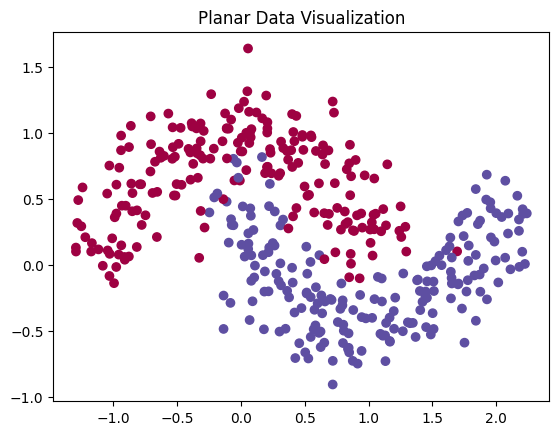

In [13]:
# Data Visualization
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
plt.title("Planar Data Visualization")
plt.show()